In [1]:
import pandas as pd #Data processing
import numpy as np #Linear algebra
import matplotlib.pyplot as plt #Plotting
import plotly.express as px #Data visualization
import statsmodels.api as sm #For LOWESS computation
from scipy.stats import chi2_contingency #Chi-squared testing
from IPython.display import display, Markdown #Markdown typing in python code

from sklearn import preprocessing, tree #Preprocessing data and graphing decision tree
from sklearn.preprocessing import StandardScaler #Standard scaling values
from sklearn.model_selection import train_test_split, GridSearchCV #Data splitting and model fitting
from sklearn.metrics import confusion_matrix, recall_score #Confusion matrix and computing recall score

from sklearn.neighbors import KNeighborsClassifier #KNN model
from sklearn.tree import DecisionTreeClassifier #Decision tree model
from sklearn.neural_network import MLPClassifier #Neural network model

import pydotplus #Graphing decision tree
import graphviz #Graphing decision tree

%matplotlib inline

# Overview of the dataset

For the purpose of this analysis, we will explore data containing medical observations created by combining several data sets from:
* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations

For ease of use, a copy of the data set has been uploaded to a github, and will be used hereafter.

In [2]:
#Import the copy of the dataset
h_data = pd.read_csv('https://raw.githubusercontent.com/SPariente/heartattack/master/heart.csv') 

In [3]:
h_data.head() #visualize the first 5 entries

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


As explained in the [Kaggle source](https://www.kaggle.com/fedesoriano/heart-failure-prediction), the variables found in this data set are:
- **Age**: age of the patient [years]
- **Sex**: sex of the patient [M: Male, F: Female]
- **ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP**: resting blood pressure [mm Hg]
- **Cholesterol**: serum cholesterol [mg/dl]
- **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
- **Oldpeak**: oldpeak = ST [Numeric value measured in depression] depression induced by exercise relative to rest
- **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease**: output class [1: heart disease, 0: Normal]

In [4]:
h_data.info() #Get information on the components of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


We can see that there are no missing variables at first glance in the dataframe.

In [5]:
h_data.describe() #Get statistical data on numerical dimensions

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


While no values are missing at first glance, we can infer that some of the 0-value entries should be considered as incomplete data:
* A resting blood pressure (**RestingBP**) of 0 would mean death, and should be revised before using it to build a prediction algorithm
* A serum cholesterol level (**cholesterol**) of 0 is unlikely, and would mean other severe medical conditions for the patient, and as such should also be revised before being used for a prediction algorithm

# Data visualisation

Now that we have a basic idea of what the data frame is like, data visualization can be started.
We will first separate our data fields based on whether they are categorical, numerical, or binary.

In [6]:
num_fields = h_data.drop(['HeartDisease'], axis = 1).select_dtypes(np.number).columns.to_list() #Numerical (incl. binary) fields
cat_fields = h_data.select_dtypes(object).columns.to_list() #Categorical fields
bin_fields = ['FastingBS'] #Binary field

## Numerical data

### Box plots

An effective way to look at the differences in distribution of data between healthy and diseased patients is to create box plots for numerical data.

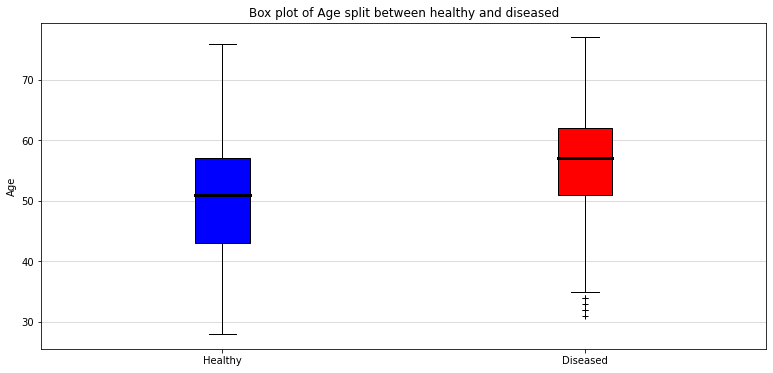

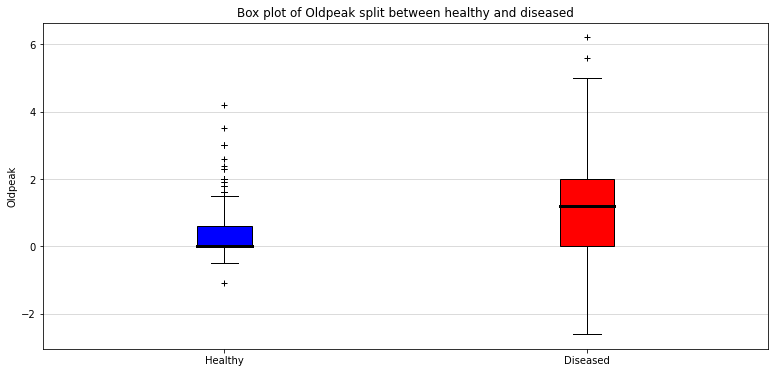

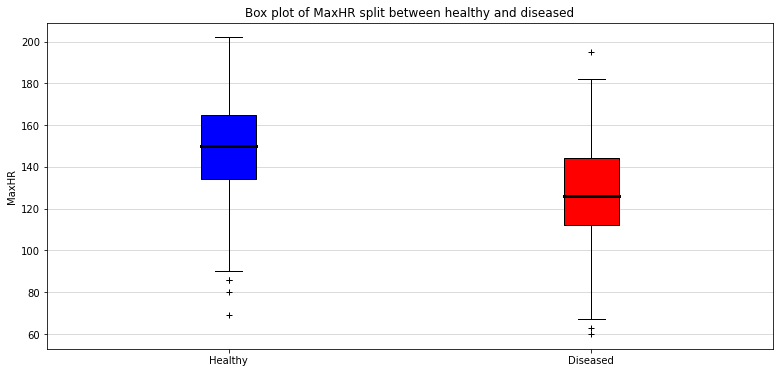

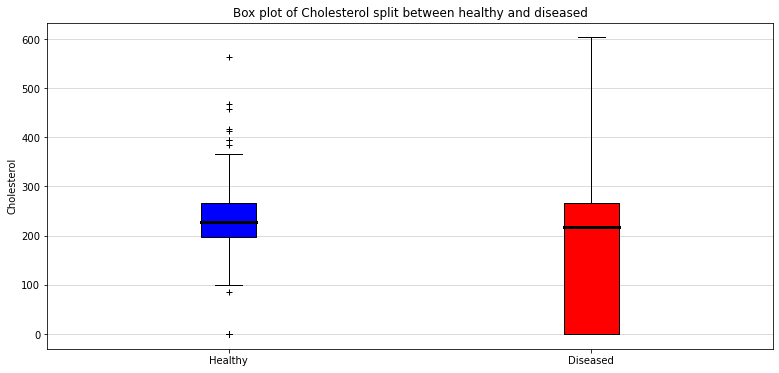

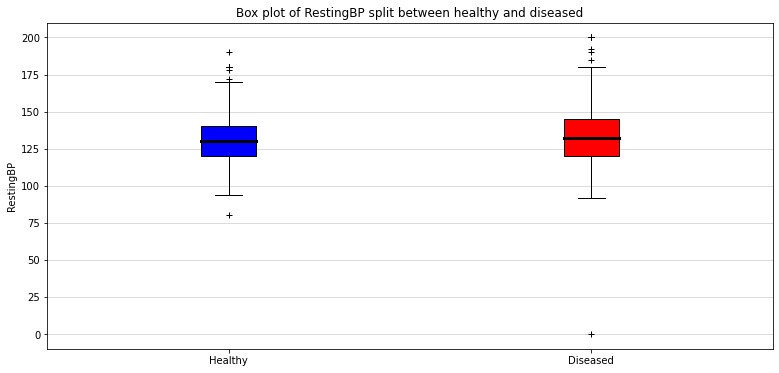

In [7]:
for colname in (set(num_fields) - set(bin_fields)): #Numerical fields excl. binary
    fig, ax = plt.subplots(figsize = (13,6)) #Subplot definition, with size of the figure
    
    bplot = ax.boxplot( #Create a boxplot
        [h_data[h_data['HeartDisease'] == 0][colname], #First column = healthy
         h_data[h_data['HeartDisease'] == 1][colname]], #Second column = diseased
        labels = ['Healthy', 'Diseased'], #Label names, in order of columns
        vert = True, #Vertical box plot
        patch_artist = True, #Access artist layer
        sym = '+', #Symbol for outliers
        medianprops = {
            'color':'black', #Color of median in boxes,
            'linewidth': 3 #Width of the median
        }
    )
    
    colors = ['blue', 'red'] #Color of the boxes, from left to right
    
    for patch, color in zip(bplot['boxes'], colors): #Iterate through the artist layer of the boxes
        patch.set_facecolor(color) #Set the color of the box
    
    ax.grid(True, axis = 'y', color = 'lightgrey') #Add light gray y grid
    ax.set_ylabel(colname)
    
    ax.set_title("Box plot of "+colname+" split between healthy and diseased") #Set title accordingly
    
    plt.show() #Show the figure

From the box plots, we can see that:
* Patients with a heart disease tend to reach a lower maximum heart rate on average than healthy patients
* Patients with a heart disease tend to exhibit a higher ST depression induced by exercise relative to rest (Oldpeak) on average than healthy patients
* Older patients are more susceptible to heart disease than younger patients

### Scatter plots

To further explore the available data, we will look at scatter plots for all possible combinations across numerical (including binary) data. To better assess possible trends, healthy and diseased patients will be color-coded (blue or red respectively), and a lowess curve will be added, using 25% of the available data.

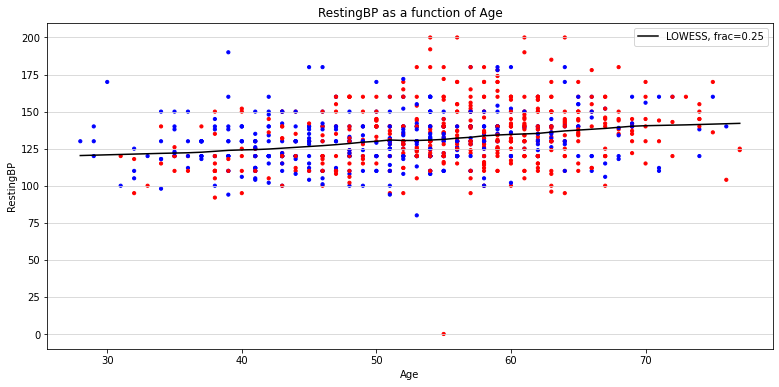

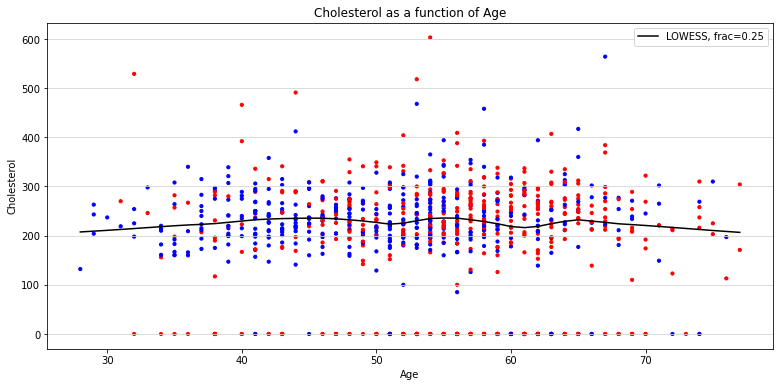

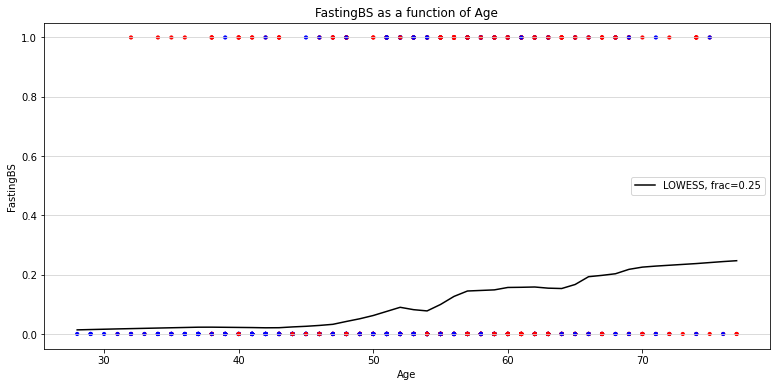

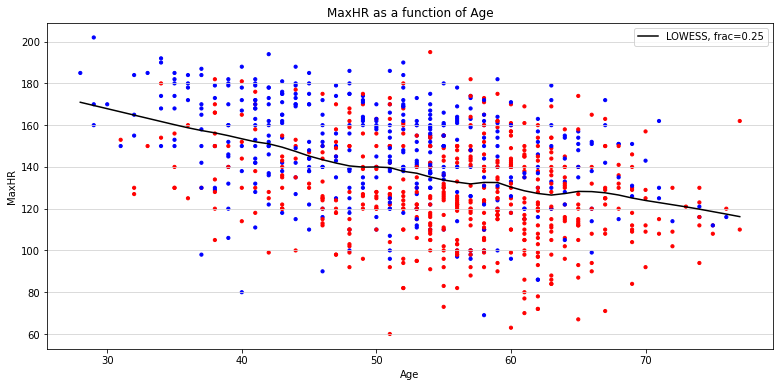

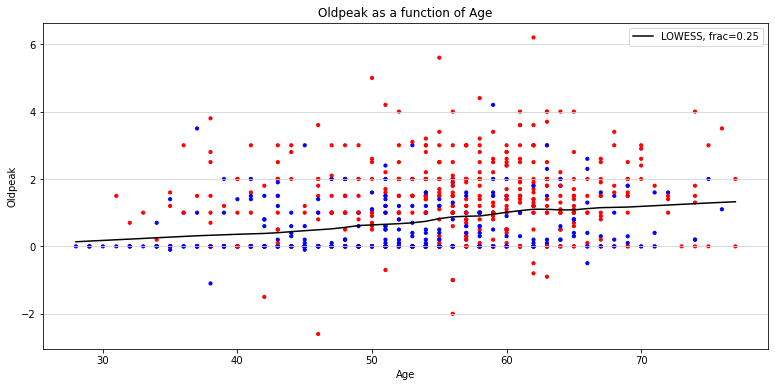

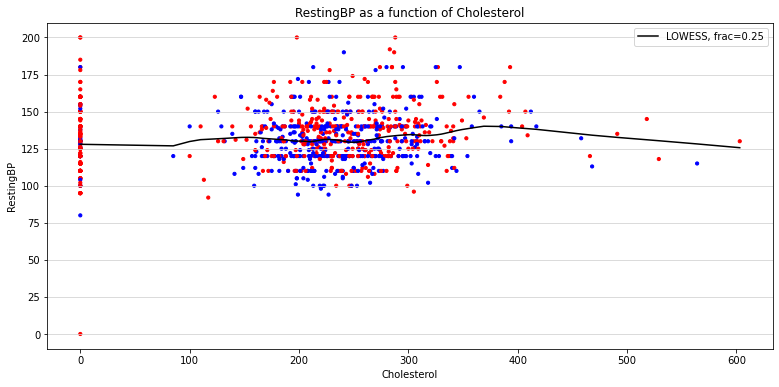

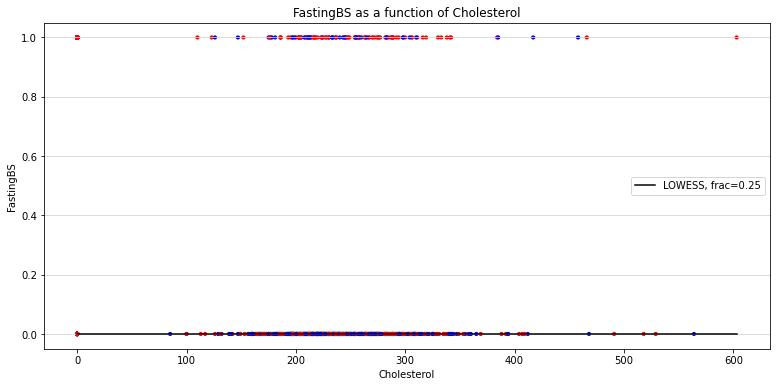

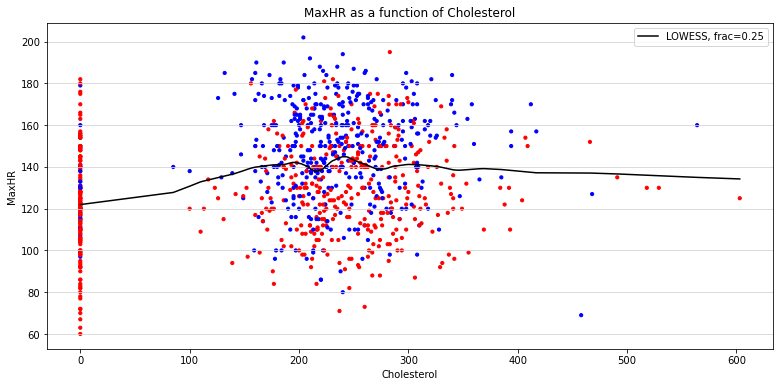

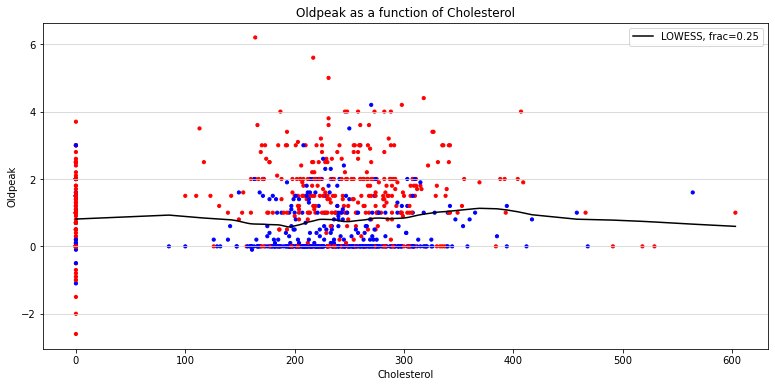

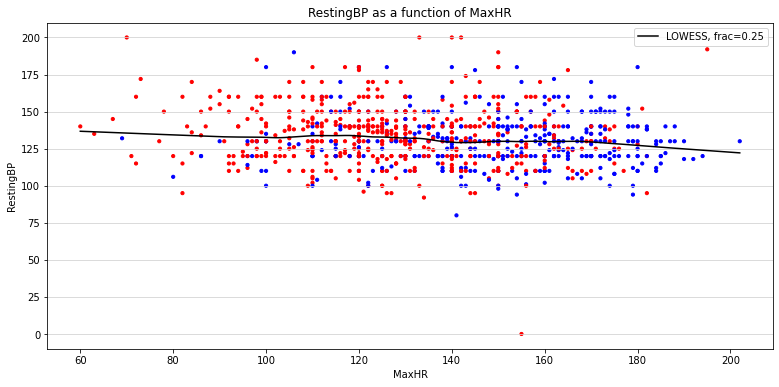

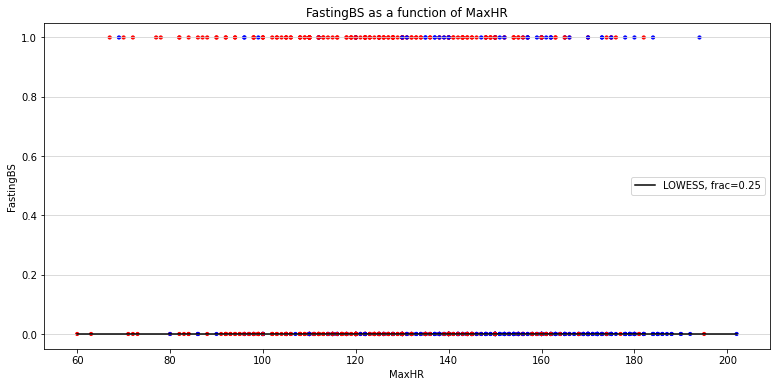

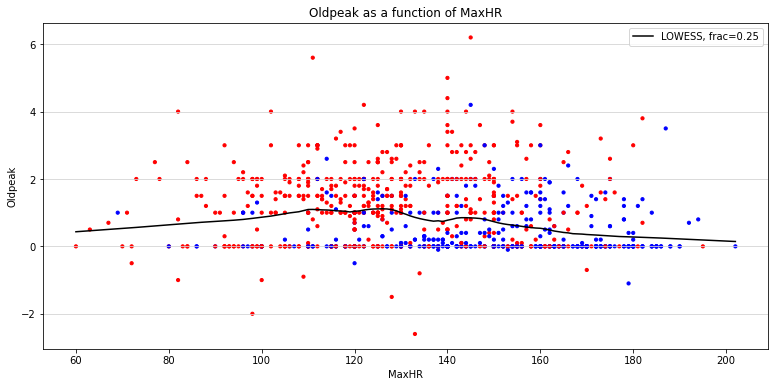

In [8]:
numvalues = num_fields.copy() #Create a copy of the numerical fields, to modify
l_frac = 0.25 #Set 25% of data to be used for lowess

for i in numvalues: #Iterate through numerical fields names
    temp = numvalues.copy() #Create a copy of the numerical fields
    temp.remove(i) #Remove the name of the numerical field from the copy
    for j in temp: #Iterate through the remaining numerical fields
        
        X = h_data[i]
        Y = h_data[j]
        
        fig, ax = plt.subplots(figsize = (13,6)) #Subplot definition, with size of the figure 
        
        ax.scatter( #Create scatter plot
            X,
            Y,
            c = h_data['HeartDisease'], #Color points by outcome (healthy or diseased)
            s = 10, #Set size of points
            cmap = 'bwr' #Set color scheme to blue and red
        )
        ax.set_xlabel(i) #Name the x axis
        ax.set_ylabel(j) #Name the y axis
        ax.set_title(j+' as a function of '+i) #Give a title to the figure
        ax.grid(True, axis = 'y', color = 'lightgrey') #Add a light gray y grid
        
        loess = sm.nonparametric.lowess(Y, X, frac = l_frac) #Compute the lowess
        
        ax.plot( #Add lowess line
            loess[:,0],
            loess[:,1],
            label = 'LOWESS, frac='+str(l_frac),
            c = 'black' #Black color for line
        )
        ax.legend() #Add legend for lowess
        
        plt.show() #Show figure
                
    numvalues.remove(i) #Remove the name iterated from the numerical fields, before the next iteration

In addition to the findings from the previous box plots, we can see that:
* The resting blood pressure, fasting blood sugar, and oldpeak tend to increase with age, while the maximum heart rate tends to decrease
* The resting blood pressure tends to decrease when the maximum heart rate increases

## Categorical data

In parallel to the numerical data already explored, we will look at the distribution of healthy and diseased patients across the categorical fields.

### Bar charts

An easy way to visualise this binary distribution across categories is to use proportionnally stacked bar charts, with each bar representing a category and each segment representing an outcome.

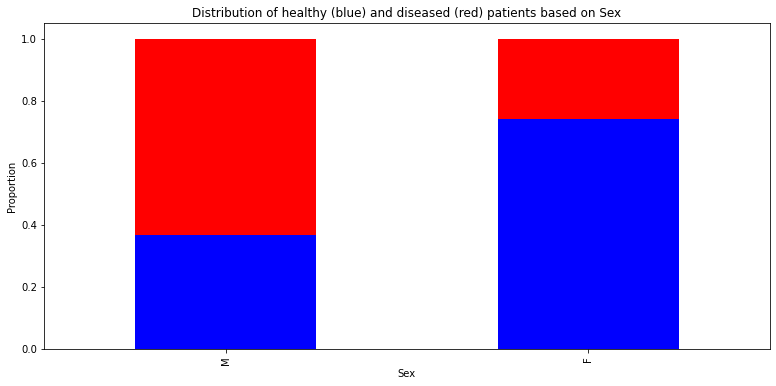

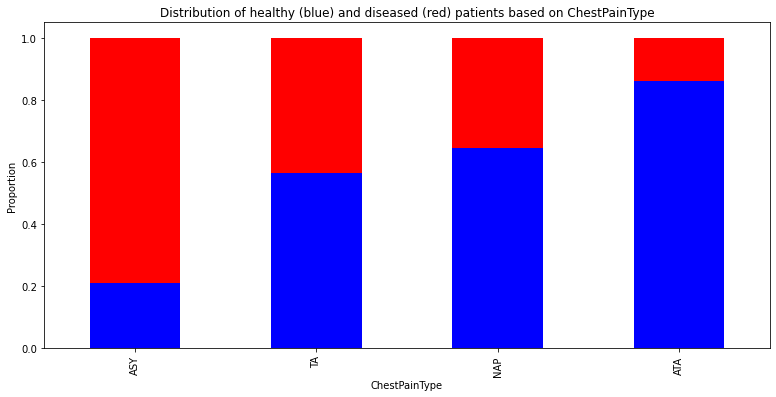

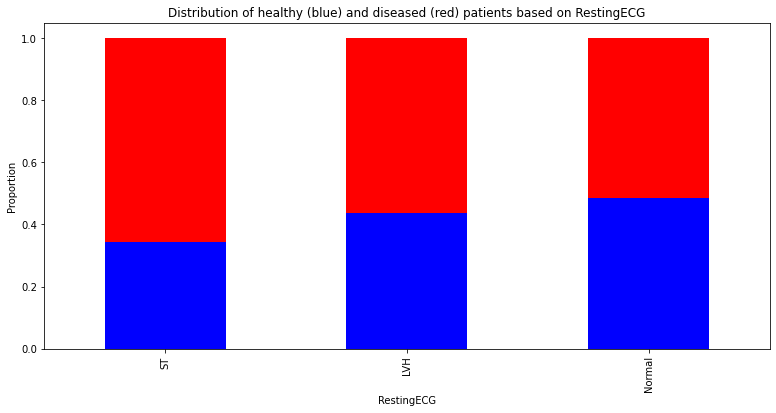

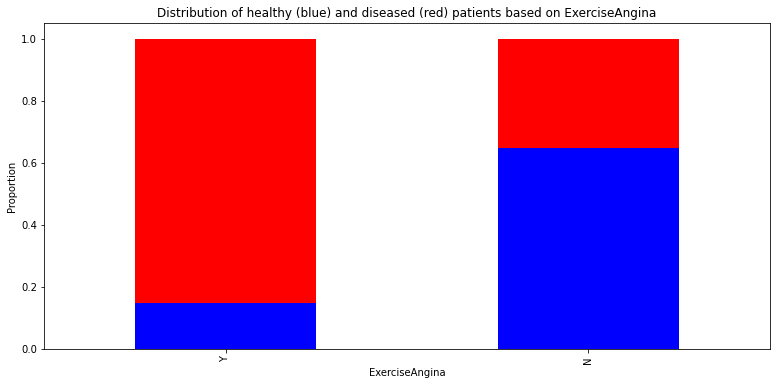

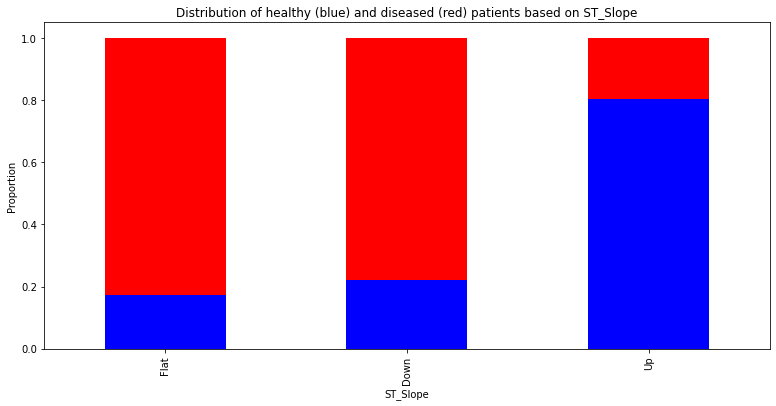

In [9]:
for colname in cat_fields: #Iterate through categorical fields
    h_data_bar = h_data[[colname, 'HeartDisease']].groupby(colname).mean('HeartDisease') #Create a dataframe containing the proportion of diseased patients by category
    h_data_bar['Healthy'] = 1-h_data_bar['HeartDisease'] #Create a column containing the remaining proportion (i.e. healthy patients)
    h_data_bar.sort_values(by = 'HeartDisease', ascending = False, inplace = True) #Sort by descending proportion of diseased patients
    h_data_bar.reindex(
        columns = ['Healthy', 'HeartDisease'], #Place the column containing the healthy proportion first
        copy = False #In the same dataframe
    ).plot(
        kind = 'bar', #Create a bar plot
        stacked = True, #Set it to be a stacked bar plot
        cmap = 'bwr', #Blue red color map
        figsize = (13,6), #Size of the figures
        legend = None #No legend needed
    )
    
    plt.ylabel('Proportion') #Add label to y axis
    
    plt.title("Distribution of healthy (blue) and diseased (red) patients based on "+colname) #Set a title
    plt.show() #Show the figure

From these figures, we can quickly identify risk factors across categories, with the riskiest individual having the following characteristics:
* Male
* Asymptomatic chest pain
* ST-T wave abnormality on resting ECG
* Exercise-induced angina
* Flat slope of the peak exercise ST segment

In [10]:
prob = h_data[
    (h_data['Sex']=="M") &
    (h_data['ChestPainType']=="ASY") &
    (h_data['RestingECG']=="ST") &
    (h_data['ExerciseAngina']=="Y") &
    (h_data['ST_Slope']=="Flat")]["HeartDisease"].mean()

prob_tot = h_data["HeartDisease"].mean()

display(Markdown("Based on our data set, {:2.0%} of patients with this combination of factors exibit a heart condition. This is significantly higher than the {:2.0%} heart disease rate overall in our sample.".format(prob, prob_tot)))

Based on our data set, 94% of patients with this combination of factors exibit a heart condition. This is significantly higher than the 55% heart disease rate overall in our sample.

### Differences by sex

In the sample used, we noted that men seem to exhibit a higher probability for heart disease than women, overall.
One could challenge the statistical relevance of this finding, considering that the sample may contain different population characteristics for men and women. 

In [11]:
h_data[['Sex', 'Age']].groupby('Sex').describe()

Age                                                   
     count       mean       std   min   25%   50%   75%   max
Sex                                                          
F    193.0  52.492228  9.517593  30.0  46.0  53.0  60.0  76.0
M    725.0  53.782069  9.397864  28.0  47.0  55.0  60.0  77.0

As we can see, both populations seem to have a similar distribution across age ranges, with close means and standard deviations, as well as extremums.
We can see however that the number of women (193) is materially smaller than the number of men (725) in our sample. This in turn implies a higher margin of error for any statistical analysis on women than on men.
To be able to conclude that men seem to have a higher risk of heart disease than women, based on our sample, we need to reject the null hypothesis, i.e. that this probability is independent on gender.
To this end, a chi-squared test will be performed on our data set.

In [12]:
h_data_sex = h_data[["Age", "Sex", "HeartDisease"]].groupby(["Sex","HeartDisease"]).count() #Count the occurences for each outcome by sex
h_data_sex.rename(columns = {'Age':'Count'}, inplace = True) #Rename the column to "Count"
h_data_sex.reset_index(inplace = True) #Reset the index, to use the existing columns for the pivot

h_data_sex = h_data_sex.pivot( #Create a pivot table with the outcome as index, sex as columns, and the number of occurences as values
    index = ["HeartDisease"],
    columns = ["Sex"],
    values = ["Count"]
)

h_data_sex

Count     
Sex              F    M
HeartDisease           
0              143  267
1               50  458

The first step is to create a data frame with the number of observations by sex and outcome, on which to perform the 1-degree-of-freedom chi-squared test.

In [13]:
stat, p, dof, expctd = chi2_contingency(h_data_sex) #Chi-squared test on the dataframe

display(Markdown("With a probability of ca. {:1.1}, we can safely reject the null hypothesis and consider that the sample shows a higher probability of heart disease in men than women.".format(p)))

With a probability of ca. 5e-20, we can safely reject the null hypothesis and consider that the sample shows a higher probability of heart disease in men than women.

# Modelling to predict heart disease

Our objective is to reach an ability to predict heart disease in patients, based on a set of medical observations.
To this end, we will use the available data set to tune several supervised algorithms, in an effort to find an acceptable solution. The algorithms will be rated based on recall primarily, as the risk of false negatives (i.e. findind the patient healthy when they are not) is the worst possible outcome.

## Preliminary data wrangling

To begin with, let us once again have a quick look at the data set with which we are working.

In [14]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


There are no missing values at first glance, either in the numerical or categorical fields.

In [15]:
h_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Nevertheless, as highlighted in the data exploration phase, we can notice a few fields that have unexpected 0-values: serum cholesterol (**Cholesterol**) and resting blood pressure (**RestingBP**).

In [16]:
print("There are {:1} entries in RestingBP with a value of 0.".format(sum(h_data['RestingBP']==0)))
print("There are {:1} entries in Cholesterol with a value of 0.".format(sum(h_data['Cholesterol']==0)))

There are 1 entries in RestingBP with a value of 0.
There are 172 entries in Cholesterol with a value of 0.


Considering the single missing entry in RestingBP, we will assign the average to this observation instead.
For serum cholesterol, however, the large number of missing entries leads us to the decision to remove the field entirely from the modelling, to avoid mis-calibration.

In [17]:
#Replace zero resting BP by sample average
h_data_tr = h_data.copy()
restingBP_zero_index = h_data_tr[h_data_tr['RestingBP'] == 0].index #Get index of 0 value in RestingBP
restingBP_mean = h_data_tr[h_data_tr['RestingBP'] != 0]['RestingBP'].mean() #Get mean excluding 0 value
h_data_tr.loc[restingBP_zero_index, 'RestingBP'] = restingBP_mean #Replace 0 value by mean

In [18]:
# Drop cholesterol field
h_data_tr.drop('Cholesterol', axis = 1, inplace = True) 

In [19]:
h_data_tr.describe()

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540894,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989932,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,1.000000,202.000000,6.200000,1.000000


The data now appears to be in an adequate state for modelling.

The next step is to split the data between predictors and outcomes.

In [20]:
X_raw = h_data_tr.drop("HeartDisease", axis = 1) #Predictors
Y = h_data_tr["HeartDisease"].to_numpy() #Outcome, in numpy array form

Then, a one-hot encoding step is applied to turn categorical predictors into numerical (binary) ones.

In [21]:
X = pd.get_dummies(X_raw) #One hot encoding, by creating dummy variables for non-numerical ones

The resulting set of predictors is then standard-scaled.

In [22]:
X = preprocessing.StandardScaler().fit(X).transform(X) #Pre-processing step for standard scaling

Finally, the data is randomly split between a training set and a test set, with 20% of the data kept for testing purposes.

In [23]:
test_size = 0.2 #20% of data used in test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = 5) #Split of data between training and test set
X_raw_train, X_raw_test, Y_train, Y_test = train_test_split(X_raw, Y, test_size = test_size, random_state = 5) #Identical split of raw data, to be used later for error analysis

## Modelling

With the data in a usable shape, we move on the the modelling phase. We will define a baseline, before exloring 3 supervised categorisation algorithms:
* K-nearest neighbors
* Binary decision tree
* Neural network

In [24]:
#Function to show the confusion matrix
def plot_confusion_matrix(y,y_predict):
    '''
    this function creates a data frame with the confusion matrix
    '''
    cm = confusion_matrix(y_predict, y) #Get the confusion matrix in array form
    cm_df = pd.DataFrame( #Turn the confusion matrix into a data frame
        cm,
        columns = ["True Healthy", "True Diseased"],
        index = ["Predicted Healthy", "Predicted Diseased"])
    return cm_df

### Naive Bayes

We first need to define a reasonable baseline approach, to which we will compare the outcomes of the other algorithms.
The simplest reasonable approach we can take is to assign the result at random, with a probability of each outcome equal to the observed probabilities in our sample.

In [25]:
p = h_data['HeartDisease'].mean() #Sample probability of a heart disease
np.random.seed(5) #Set the seed
Y_predict_nb = np.random.binomial(n = 1, p = p, size = Y_test.shape[0]) #Create an array randomly populated with 0 and 1, based on a p probability of drawing 1

plot_confusion_matrix(Y_test, Y_predict_nb) #Plot the resulting confusion matrix on the test set

,True Healthy,True Diseased
Predicted Healthy,34,46
Predicted Diseased,39,65


In [26]:
model_results = dict(
    Naive_Bayes = recall_score(Y_test, Y_predict_nb)
) #Create model results dictionary containing the model name and the recall value

print("On the test set, the recall score is {:1.1%}.".format(recall_score(Y_test, Y_predict_nb)))

On the test set, the recall score is 58.6%.


With a 58.6% recall score, our baseline model shows an unreasonable amount of false negatives, and as such can only serve as a comparison point for the following work.

### K-nearest neighbors

A typical algorithm that can be used for categorisation problems is the K-nearest neigbors one.
We will apply it to our problem to look for relevant neighborhoods that have the same outcome, and use these to categorize the patients.

In [27]:
KNN = KNeighborsClassifier() #Initialise the KNN algorithm
parameters = dict(
    n_neighbors = list(np.arange(1,11,1)), #Between 1 and 10 neighbors in a neighborhood
    algorithm = ['auto'], #Let the algorithm attempt to find the best method
    p = [1,2]) #Either manhattan (1) or euclidian (2) distance used

In [28]:
knn_model = GridSearchCV(
    KNN,
    parameters,
    cv = 10, #10-fold cross-validation
    n_jobs = 10, #10 parallel jobs
    scoring = 'recall' #Use recall as a scoring method to find the best fit
)
knn_model.fit(X_train, Y_train) #Fit the algorithm to the training set

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=10,
             param_grid={'algorithm': ['auto'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='recall')

The best tune is found with the following hyperparameters for the model:

In [29]:
print("Tuned hyperparameters:",knn_model.best_params_)
print("Best score:",knn_model.best_score_)

Tuned hyperparameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1}
Best score: 0.8917307692307691


We can visualize the resulting confusion matrix.

In [30]:
Y_predict_knn = knn_model.predict(X_test) #Predict outcomes based on test set

plot_confusion_matrix(Y_test, Y_predict_knn) #Plot the resulting confusion matrix on the test set

,True Healthy,True Diseased
Predicted Healthy,66,14
Predicted Diseased,7,97


In [31]:
model_results.update(
    dict(
        KNN = knn_model.score(X_test, Y_test)
    )
) #Add recall value to model results dictionary

print("On the test set, the recall score is {:1.1%}.".format(knn_model.score(X_test, Y_test)))

On the test set, the recall score is 87.4%.


With a recall score of only 87.4%, meaning that 12.6% of diseased patients are predicted as healthy, this result can certainly be improved.

### Binary decision tree

Decision trees are another typical supervised categorisation algorithm. In our case, we will use it to find the best set of nodes to use to predict whether a patient is suffering from a heart disease, based on our observations.

In [32]:
tree_class = DecisionTreeClassifier(random_state = 5)
parameters = dict(
    criterion = ['gini', 'entropy'], #To measure the quality of a split
    max_depth = [n for n in range(3,9)], #Maximum depth of the tree, between 3 and 8 nodes
    splitter = ["best", "random"], #Strategy used to split each node
    max_features = ["auto", None], #Maximum number of features to look for
    min_samples_split = [n for n in range(2,8)], #Minimum number of samples for a split
    min_samples_leaf = [1,2,3] #Minimum number of leaves to be considered a node
)

In [33]:
tree_model = GridSearchCV(
    tree_class,
    parameters, 
    cv = 10, #10-fold cross-validation
    n_jobs = 10, #10 parallel jobs
    scoring = 'recall' #Use recall as a scoring method to find the best fit
)

tree_model.fit(X_train, Y_train) #Fit the decision tree

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5), n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']},
             scoring='recall')

The best tune is found with the following hyperparameters for the model:

In [34]:
print("Tuned hyperparameters:",tree_model.best_params_)
print("Best score:",tree_model.best_score_)

Tuned hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Best score: 0.9320512820512821


We can visualize the resulting confusion matrix.

In [35]:
Y_predict_tree = tree_model.predict(X_test) #Predict outcomes based on test set

plot_confusion_matrix(Y_test, Y_predict_tree) #Plot the resulting confusion matrix on the test set

,True Healthy,True Diseased
Predicted Healthy,61,11
Predicted Diseased,12,100


In [36]:
model_results.update(
    dict(
        Tree = tree_model.score(X_test, Y_test)
    )
) #Add recall value to model results dictionary

print("On the test set, the recall score is {:1.1%}.".format(tree_model.score(X_test, Y_test)))

On the test set, the recall score is 90.1%.


With a recall score of 90.1%, meaning that 9.9% of diseased patients are predicted as healthy, this result is an improvement over the KNN one.

We can draw the tree, to see what the nodes look like.

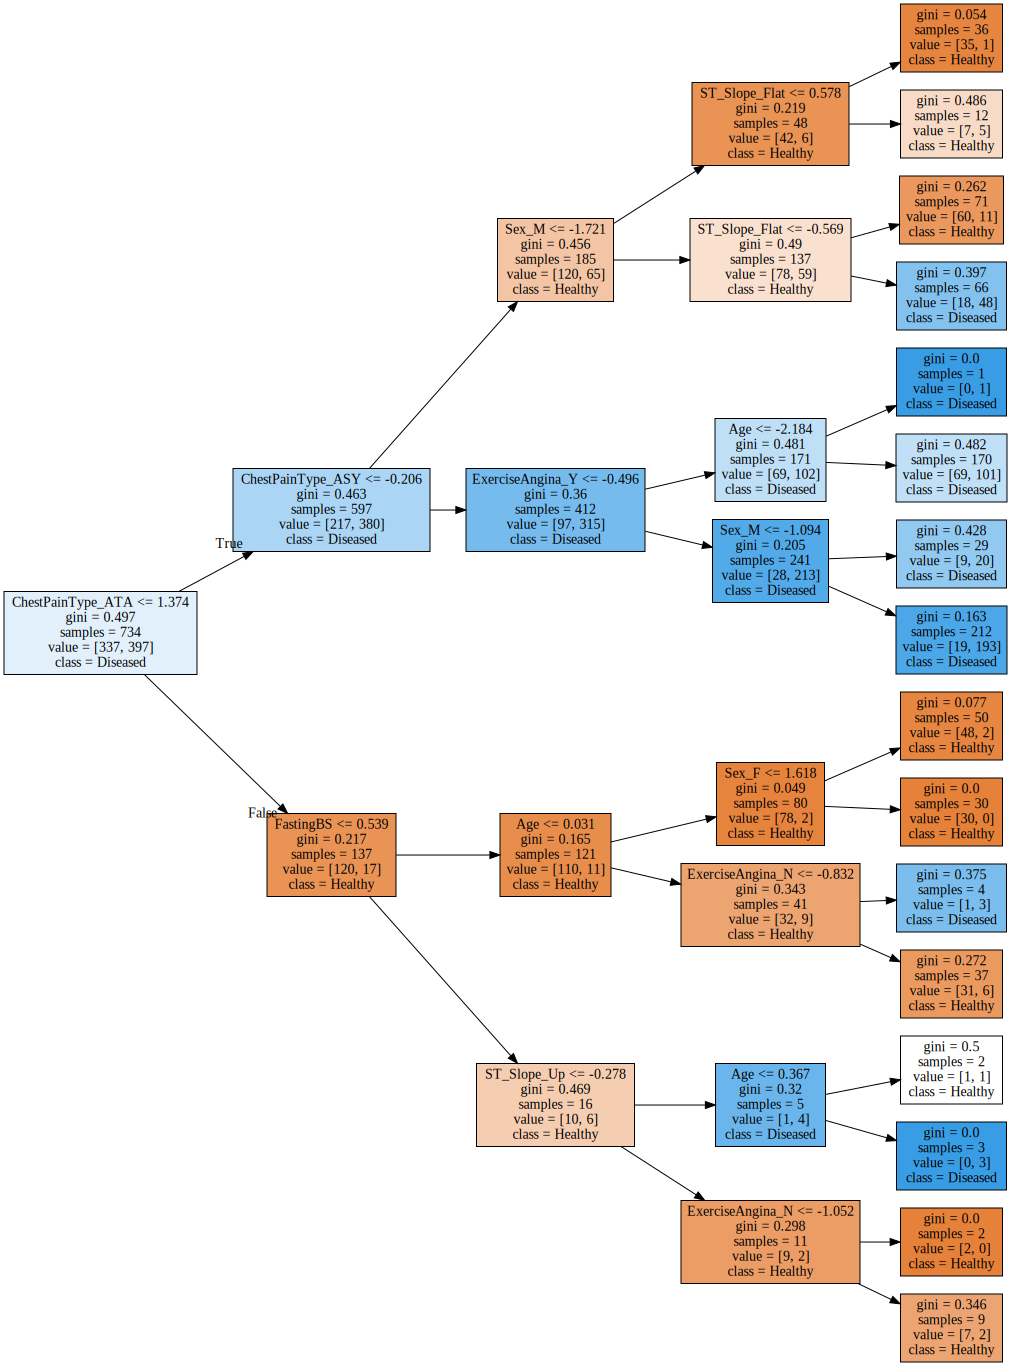

In [37]:
featureNames = pd.get_dummies(X_raw).columns #Get the names of the predictions, including dummy predictors created

dot_data = tree.export_graphviz( #Export decision tree in dot format
    tree_model.best_estimator_, #Select the decision tree
    feature_names=featureNames, #Use the names of features generated
    class_names= ["Healthy", "Diseased"], #Names of the classes, in numerical ascending order
    filled=True, #Fill the leaves with outcome-based color
    rotate=True #Horizontal tree
)  

graph = graphviz.Source(dot_data, format = 'png') #Render the dot source as png
graph.render("HeartDiseaseTree", cleanup = True) #Render the png
graph #Show the rendered png

### Neural Network

The last supervised algorithm we will consider here is a neural network. We will look at 1 or 2 hidden layers, given the limited number of predictors and the amount of observations.

In [38]:
n_size = len(X_train[0]) #Size of the hidden layer, here equal to the size of the input layer

nn = MLPClassifier(random_state = 5) #Initialize the neural network
parameters = dict(
    hidden_layer_sizes=[(n_size,), (n_size,n_size,)], #Hidden layer size (1 or 2 layers)
    activation=['identity', 'logistic', 'tanh', 'relu'], #Activation function for the hidden layer
    solver=['lbfgs', 'adam'], #Solver method
    alpha=[0.0001, 0.001], #L2 penalty
    early_stopping = [True] #Allows early stopping when further iterations do not improve the outcome
)

In [39]:
nn_model = GridSearchCV(
    nn,
    parameters,
    cv = 10, #10-fold cross-validation
    n_jobs = 10 #10 parallel jobs
    #No focus on recall, as this could result in a 100% recall but very inaccurate model.
)
nn_model.fit(X_train, Y_train) #Fit the neural network, using the training data

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=5), n_jobs=10,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001], 'early_stopping': [True],
                         'hidden_layer_sizes': [(19,), (19, 19)],
                         'solver': ['lbfgs', 'adam']})

The best tune is found with the following hyperparameters for the model:

In [40]:
print("Tuned hyperparameters:",nn_model.best_params_)
print("Accuracy:",nn_model.best_score_)

Tuned hyperparameters: {'activation': 'identity', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (19,), 'solver': 'lbfgs'}
Accuracy: 0.8487967419474268


We can visualize the resulting confusion matrix.

In [41]:
Y_predict_nn = nn_model.predict(X_test) #Predict outcomes based on test set
plot_confusion_matrix(Y_test, Y_predict_nn) #Plot the resulting confusion matrix on the test set

,True Healthy,True Diseased
Predicted Healthy,66,10
Predicted Diseased,7,101


In [42]:
model_results.update(
    dict(
    NN = recall_score(Y_test, Y_predict_nn)
    )
) #Add recall value to model results dictionary

print("On the test set, the recall score is {:1.1%}.".format(recall_score(Y_test, Y_predict_nn)))

On the test set, the recall score is 91.0%.


With a recall score of 91.0%, meaning that 9.0% of diseased patients are predicted as healthy, this approach is an improvement over both the previous ones.

### Focus on false negatives

Before concluding, we will have a look at the false negatives resulting from the most accurate model, i.e. the single layer neural network.

In [43]:
#Extracting the false negatives from the original data set
false_neg = pd.DataFrame(X_raw_test[(Y_predict_nn!=Y_test) & (Y_predict_nn==0)]) #Find the false negatives in the test set
false_neg = h_data.iloc[list(false_neg.index),] #Extract the index from these observations and find them in the original data set
false_neg #Show the resulting data frame

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
899,61,M,ASY,148,203,0,Normal,161,N,0.0,Up,1
893,57,M,ATA,154,232,0,LVH,164,N,0.0,Up,1
889,59,M,TA,134,204,0,Normal,162,N,0.8,Up,1
207,35,M,ATA,110,257,0,Normal,140,N,0.0,Flat,1
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
879,48,M,ATA,110,229,0,Normal,168,N,1.0,Down,1
661,49,M,NAP,118,149,0,LVH,126,N,0.8,Up,1
322,38,F,ASY,105,0,1,Normal,166,N,2.8,Up,1
763,58,M,NAP,132,224,0,LVH,173,N,3.2,Up,1
436,58,M,ASY,116,0,0,Normal,124,N,1.0,Up,1


In [44]:
false_neg.eq(false_neg.iloc[1,:]).all() #Find common elements

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina     True
Oldpeak           False
ST_Slope          False
HeartDisease       True
dtype: bool

From this table, we can notably see that:
* All patients do not exhibit an exercise angina
* All but one have a fasting blood sugar level below 120 mg/dL
* All but one are male
* All but two exhibit an upsloping peak exercise ST segment

It should be noted however, that all but one of the available cholesterol serum measurements indicate an unhealthy (> 200 mg/dL) level of serum cholesterol. It is possible that by including this as a predictor, after gathering additional data on the missing observation points, may improve the predictive ability with this approach.

# Conclusion

With a resulting recall of 91.0% on the test set, the neural network (**NN** in the following table) algorithm used gives the best result of the four approaches.

In [45]:
pd.DataFrame(data = model_results, index = ["Recall score (test set)"])

,Naive_Bayes,KNN,Tree,NN
Recall score (test set),0.585586,0.873874,0.900901,0.90991


Nevertheless, while this model is the best of the four approaches, it still missed 9% of the actual diseased patients, which could lead to 10 missed disease diagnostics. This being broadly unacceptable, additional work would be needed to further refine the results.
A possible improvement to the approach, introduced earlier, would be to improve the data on serum cholesterol levels across diseased patients, which would enable us to consider this field in the algorithm. Given the prevalence of above-recommended levels of cholesterol in the missed diagnostics, it may help correctly identify these patients as being at risk.

This finding is in line with most medical litterature, which state that heart disease is more prevalent among men than pre-menopausal women, at the same age range. While this difference progressively disappears post-menopause age, it can explain the observed difference in heart disease likelihood across both sexes in our sample.